In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("./Data/c4.csv", parse_dates=['DATE'])
df.set_index("DATE", inplace=True)


In [3]:
series = df['Consumption']

In [4]:
# SMA
window = 7

sma = series.rolling(window=window).mean()

In [8]:
# WMA
weights = np.arange(1, window + 1)

wma = series.rolling(window).apply(
    lambda x: np.dot(x, weights) / weights.sum(),
    raw=True
)

In [11]:
ema = series.ewm(span=window, adjust=False).mean()

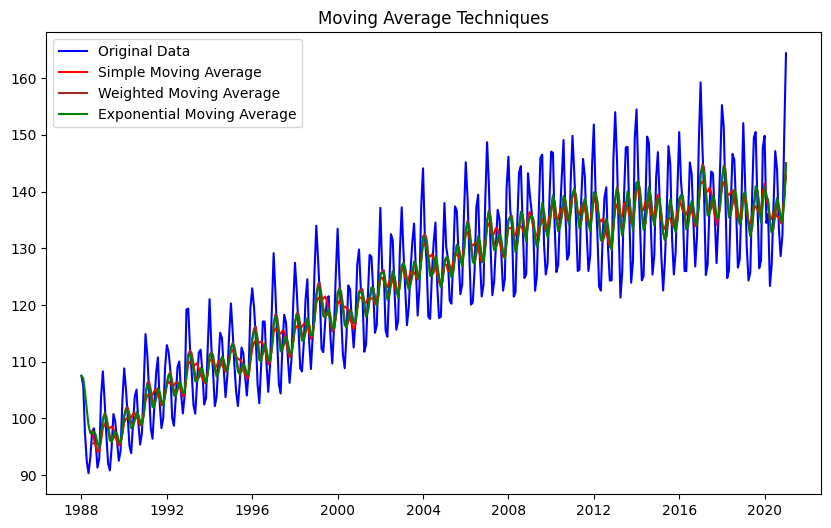

In [22]:
plt.figure(figsize=(10, 6))

plt.plot(series, color='blue', label='Original data')
plt.plot(sma, color='red', label='Simple Moving Average')
plt.plot(wma, color='brown', label='Weighted Moving Average')
plt.plot(ema, color='green', label='Exponential Moving Average')
plt.legend()
plt.title("Moving Average Techniques")
plt.show()